# computer vision

In [1]:
import torch
from torch import nn 
import torchvision 
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [3]:
print(len(train_data), len(test_data))
class_names = train_data.classes 
print(class_names)
image, label = train_data[0]
image.shape, label

60000 10000
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


(torch.Size([1, 28, 28]), 9)

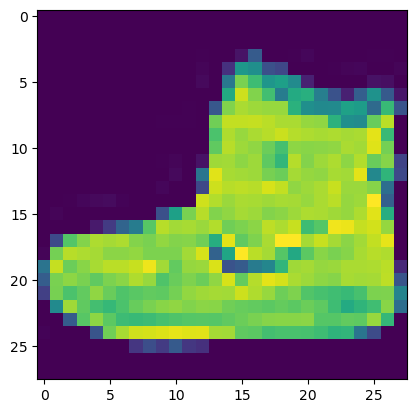

In [4]:
plt.imshow(image.squeeze())

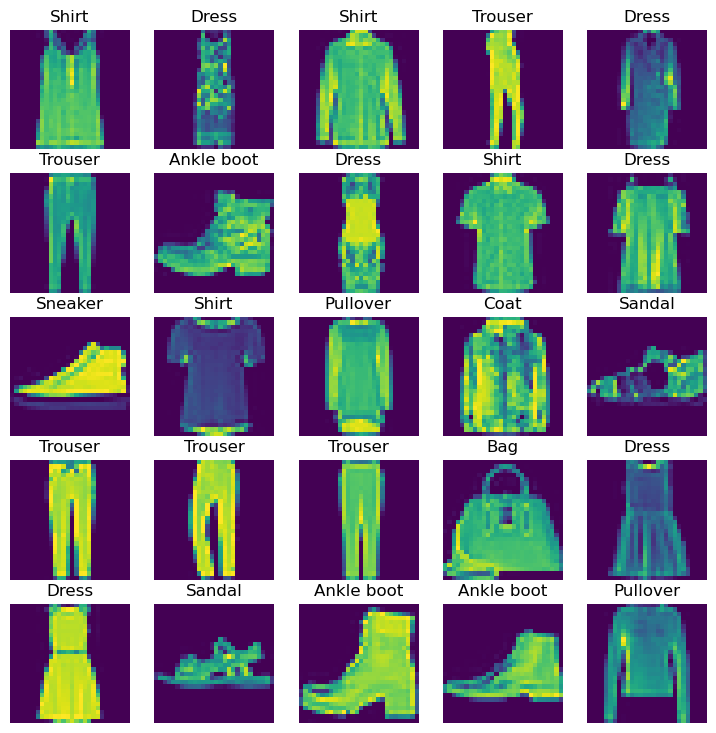

In [5]:
rows, cols = 5, 5
fig = plt.figure(figsize=(9,9))
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze())
    plt.title(class_names[label])
    plt.axis(False)

In [6]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [7]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32 

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE, 
                             shuffle=False)
                              
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [8]:
flatten_model = nn.Flatten()

x = train_features_batch[0]
output = flatten_model(x)
print(output.shape, x.shape)
output.squeeze()

torch.Size([1, 784]) torch.Size([1, 28, 28])


tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0039, 0.0000, 0.0000, 0.0118, 0.0000, 0.1647, 0.4431, 0.2196,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2510, 0.3922,
        0.6000, 0.4118, 0.0000, 0.0000, 0.0627, 0.0627, 0.0275, 0.0471, 0.1137,
        0.1333, 0.0000, 0.0000, 0.0000, 

In [9]:
class FashionModel(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units: int, 
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x)

In [10]:
torch.manual_seed(42)

model = FashionModel(
    input_shape=784, #28 * 28 
    hidden_units=10,
    output_shape=len(class_names)
)
model.to('cpu')
model, model.state_dict()

(FashionModel(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): Linear(in_features=10, out_features=10, bias=True)
   )
 ),
 OrderedDict([('layer_stack.1.weight',
               tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                       [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                       [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                       ...,
                       [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                       [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                       [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
              ('layer_stack.1.bias',
               tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                        0.0018,  0.0163])),
              ('layer_st

In [11]:
import requests
from pathlib import Path 

if Path("helper_functions.py").is_file():
    print('file already exists')
else:
    print('downloading')
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open('helper_functions.py', 'wb') as file:
        file.write(request.content)

from helper_functions import accuracy_fn

file already exists


In [12]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [13]:
from helper_functions import print_train_time
from timeit import default_timer as timer

start = timer()
end = timer()
print_train_time(start, end, 'cpu')



Train time on cpu: 0.000 seconds


1.3695999996343744e-05

### model on cpu

In [14]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs = 5


for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model.train() 
        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    
    train_loss /= len(train_dataloader)
    test_loss, test_acc = 0, 0 
    model.eval()
    
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
    
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model.parameters()).device))

/home/server/miniconda3/envs/pyTorch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 20%|██        | 1/5 [00:05<00:20,  5.12s/it]


Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 40%|████      | 2/5 [00:10<00:15,  5.21s/it]


Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 60%|██████    | 3/5 [00:15<00:10,  5.18s/it]


Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Epoch: 3
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 80%|████████  | 4/5 [00:20<00:05,  5.15s/it]


Train loss: 0.44251 | Test loss: 0.46306, Test acc: 83.75%

Epoch: 4
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 5/5 [00:25<00:00,  5.15s/it]


Train loss: 0.43582 | Test loss: 0.46869, Test acc: 83.27%


Train time on cpu: 25.738 seconds


### model on gpu

In [15]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [16]:
import torch.utils

def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = DEVICE):
    model.to(device)
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
            
        loss /= len(data_loader)
        acc /= len(data_loader)
        print(f"\nTrain loss: {loss:.5f} | Test acc: {acc:.2f}%\n")
    

In [17]:
def eval_model(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = DEVICE):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        return {'model_acc': test_acc,
                'model_loss': test_loss.item(),
                'model_name': model.__class__.__name__}

In [18]:
model1_results = eval_model(model=model,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device='cpu')

In [19]:
class FashionModel2(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units: int, 
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )
        
    def forward(self, x):
        return self.layer_stack(x)

torch.manual_seed(42)
model2 = FashionModel2(input_shape=784,
                       hidden_units=16,
                       output_shape=len(class_names)).to(DEVICE)

In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model2.parameters(),
                            lr=0.1)

In [21]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = DEVICE):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    
    

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = DEVICE):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")
        

In [22]:
torch.manual_seed(42)
train_time_start = timer()
epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(model=model2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=DEVICE)
    test_step(model=model2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=DEVICE)
    
train_time_end = timer()
total_train_time_model_1 = print_train_time(start=train_time_start, end=train_time_end, device=DEVICE)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.61550 | Train accuracy: 78.17%


 20%|██        | 1/5 [00:10<00:43, 10.93s/it]

Test loss: 0.51932 | Test accuracy: 81.54%

Epoch: 1
-------
Train loss: 0.45612 | Train accuracy: 83.79%


 40%|████      | 2/5 [00:21<00:32, 10.78s/it]

Test loss: 0.46924 | Test accuracy: 83.24%

Epoch: 2
-------
Train loss: 0.42185 | Train accuracy: 84.86%


 60%|██████    | 3/5 [00:32<00:21, 10.75s/it]

Test loss: 0.43686 | Test accuracy: 84.62%

Epoch: 3
-------
Train loss: 0.39897 | Train accuracy: 85.55%


 80%|████████  | 4/5 [00:42<00:10, 10.71s/it]

Test loss: 0.42571 | Test accuracy: 85.09%

Epoch: 4
-------
Train loss: 0.38631 | Train accuracy: 85.81%


100%|██████████| 5/5 [00:53<00:00, 10.72s/it]

Test loss: 0.42987 | Test accuracy: 84.56%


Train time on cuda: 53.606 seconds


In [23]:
model2_results = eval_model(model=model2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=DEVICE)

In [24]:
class FashionModel3(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
    
    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        return self.classifier(x)

In [25]:
torch.manual_seed(42)
model3 = FashionModel3(input_shape=1,
                       hidden_units=10,
                       output_shape=len(class_names)).to(DEVICE)
model3

FashionModel3(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [26]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor = rand_image_tensor.unsqueeze(dim=0).to(DEVICE)
model3(rand_image_tensor)

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [27]:
torch.manual_seed(42)

images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]
print(images.shape, test_image.shape)

torch.Size([32, 3, 64, 64]) torch.Size([3, 64, 64])


In [28]:
conv_layer = nn.Conv2d(in_channels=3, 
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)
print(conv_layer(test_image).shape)
print(conv_layer(test_image.unsqueeze(dim=0)).shape)

torch.Size([10, 62, 62])
torch.Size([1, 10, 62, 62])


In [29]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)
print(max_pool_layer(conv_layer(test_image)).shape)
print(max_pool_layer(conv_layer(test_image.unsqueeze(dim=0))).shape)

torch.Size([10, 31, 31])
torch.Size([1, 10, 31, 31])


In [30]:
random_tensor = torch.randn(size=(1, 1, 2, 2,))
max_pool_layer = nn.MaxPool2d(kernel_size=2)

random_tensor, max_pool_layer(random_tensor)

(tensor([[[[0.4963, 0.0045],
           [0.5534, 0.1379]]]]),
 tensor([[[[0.5534]]]]))

In [31]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model3.parameters(),
                            lr=0.1)

In [32]:
torch.manual_seed(42)
train_time_start = timer()
epochs = 10

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(model=model3,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=DEVICE)
    test_step(model=model3,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=DEVICE)
    
train_time_end = timer()
total_train_time_model_2 = print_train_time(start=train_time_start, end=train_time_end, device=DEVICE)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.60602 | Train accuracy: 77.96%


 10%|█         | 1/10 [00:15<02:17, 15.33s/it]

Test loss: 0.40334 | Test accuracy: 85.65%

Epoch: 1
-------
Train loss: 0.36684 | Train accuracy: 86.88%


 20%|██        | 2/10 [00:29<01:57, 14.71s/it]

Test loss: 0.35724 | Test accuracy: 87.07%

Epoch: 2
-------
Train loss: 0.32602 | Train accuracy: 88.16%


 30%|███       | 3/10 [00:43<01:41, 14.53s/it]

Test loss: 0.32296 | Test accuracy: 88.20%

Epoch: 3
-------
Train loss: 0.30338 | Train accuracy: 88.94%


 40%|████      | 4/10 [00:58<01:27, 14.58s/it]

Test loss: 0.32317 | Test accuracy: 88.05%

Epoch: 4
-------
Train loss: 0.28859 | Train accuracy: 89.41%


 50%|█████     | 5/10 [01:13<01:13, 14.67s/it]

Test loss: 0.29519 | Test accuracy: 89.57%

Epoch: 5
-------
Train loss: 0.27742 | Train accuracy: 89.95%


 60%|██████    | 6/10 [01:28<00:59, 14.81s/it]

Test loss: 0.31164 | Test accuracy: 88.80%

Epoch: 6
-------
Train loss: 0.26975 | Train accuracy: 90.27%


 70%|███████   | 7/10 [01:43<00:44, 14.75s/it]

Test loss: 0.32239 | Test accuracy: 88.12%

Epoch: 7
-------
Train loss: 0.26297 | Train accuracy: 90.43%


 80%|████████  | 8/10 [01:57<00:29, 14.51s/it]

Test loss: 0.29875 | Test accuracy: 89.22%

Epoch: 8
-------
Train loss: 0.25552 | Train accuracy: 90.83%


 90%|█████████ | 9/10 [02:11<00:14, 14.32s/it]

Test loss: 0.28524 | Test accuracy: 89.78%

Epoch: 9
-------
Train loss: 0.25221 | Train accuracy: 90.89%


100%|██████████| 10/10 [02:24<00:00, 14.49s/it]

Test loss: 0.31603 | Test accuracy: 88.25%


Train time on cuda: 144.931 seconds


In [33]:
model3_results = eval_model(model=model3,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=DEVICE)
model2_results, model3_results

({'model_acc': 84.564696485623,
  'model_loss': 0.4298691749572754,
  'model_name': 'FashionModel2'},
 {'model_acc': 88.2488019169329,
  'model_loss': 0.31602856516838074,
  'model_name': 'FashionModel3'})

In [34]:
compare_results = pd.DataFrame([model1_results, model2_results, model3_results])
compare_results

,model_acc,model_loss,model_name
0,83.266773,0.468694,FashionModel
1,84.564696,0.429869,FashionModel2
2,88.248802,0.316029,FashionModel3


In [35]:
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_acc,model_loss,model_name,training_time
0,83.266773,0.468694,FashionModel,25.738479
1,84.564696,0.429869,FashionModel2,53.605564
2,88.248802,0.316029,FashionModel3,144.930537


### visualise

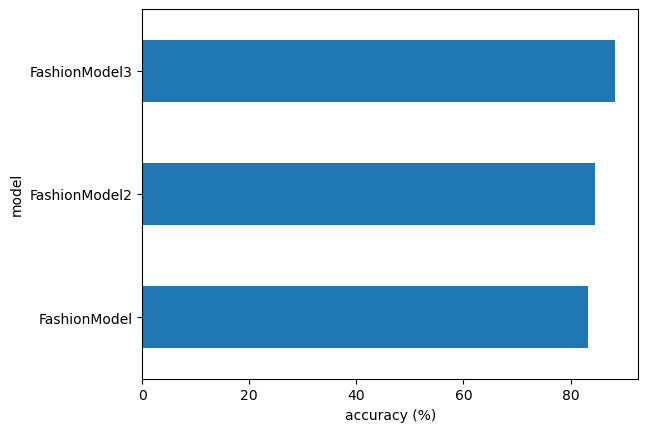

In [36]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")
plt.show()

In [37]:
def make_predictions(model: torch.nn.Module,
                     data: list, 
                     device: torch.device = DEVICE):
    
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            logit = model(sample)
            pred_prob = torch.softmax(logit.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())
    
    return torch.stack(pred_probs)

tensor([2, 8, 5, 9, 1, 7, 3, 9, 7, 0, 5, 7, 4, 1, 2, 1, 9, 5, 3, 3, 5, 4, 4, 3,
        4, 2, 0, 3, 7, 4, 2, 9, 4, 4, 4, 7, 3, 9, 1, 4, 9, 8, 9, 7, 4, 6, 3, 8,
        8])
[2, 8, 5, 9, 1, 7, 3, 9, 7, 0, 7, 7, 4, 1, 2, 1, 9, 5, 3, 3, 5, 4, 4, 3, 6, 2, 0, 3, 7, 4, 2, 9, 4, 4, 2, 7, 3, 9, 1, 4, 9, 8, 9, 7, 2, 6, 3, 8, 8]


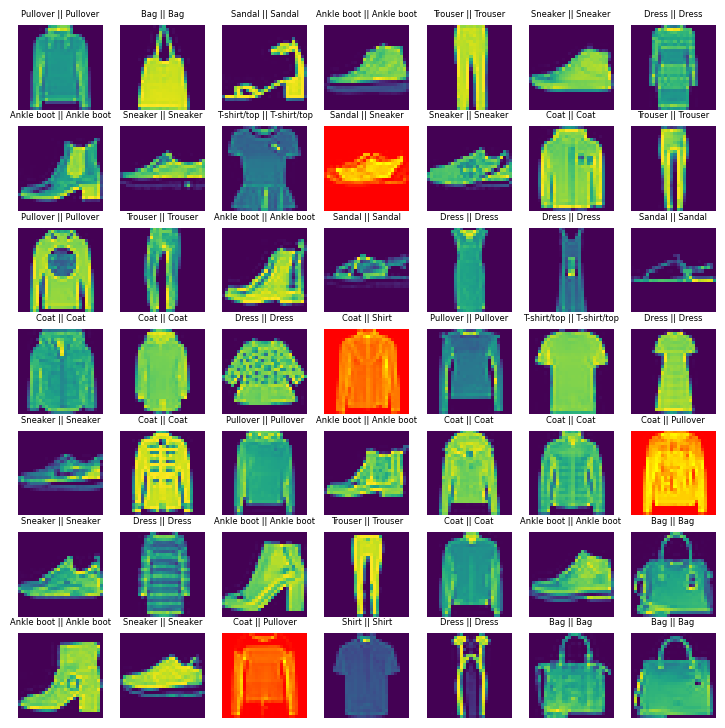

In [38]:
import random

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=49):
    test_samples.append(sample)
    test_labels.append(label)
    
pred_probs = make_predictions(model=model3, 
                              data=test_samples, 
                              device=DEVICE)

pred_classes = pred_probs.argmax(dim=1)
print(pred_classes)
print(test_labels)
plt.figure(figsize=(9,9))
for i, sample in enumerate(test_samples):
    plt.subplot(7, 7, i + 1)
    color = "viridis" if pred_classes[i] == test_labels[i] else "autumn"
    plt.axis('off')
    plt.imshow(sample.squeeze(), cmap=color)
    plt.title(class_names[pred_classes[i]] + ' || ' + class_names[test_labels[i]], fontsize=6)
plt.show()

### confusion matrix

In [43]:
from mlxtend.plotting import plot_confusion_matrix
from torchmetrics import ConfusionMatrix

preds = []
model2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader):
        X, y = X.to(DEVICE), y.to(DEVICE)
        logit = model2(X) 
        pred = torch.softmax(logit.squeeze(), dim=0).argmax(dim=1)
        preds.append(pred.cpu())        
        
y_pred_tensor = torch.cat(preds)
y_pred_tensor[:10]



100%|██████████| 313/313 [00:00<00:00, 689.35it/s]


tensor([9, 2, 1, 1, 6, 0, 4, 6, 5, 7])

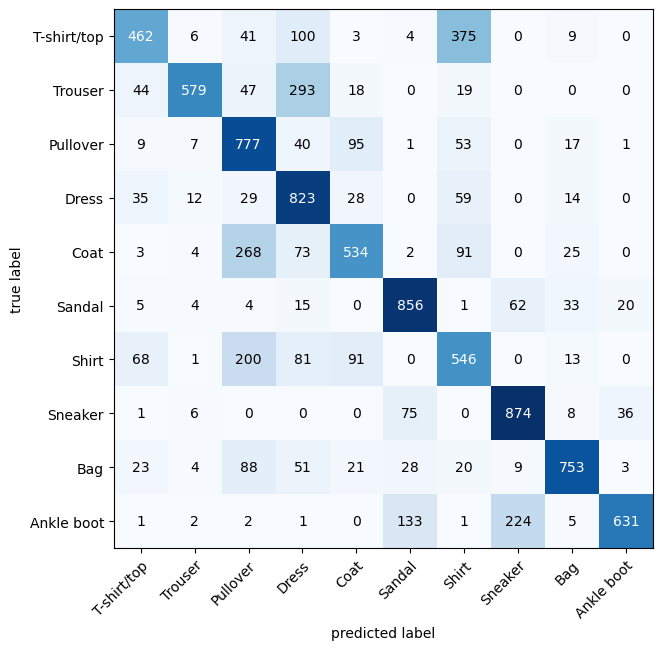

In [49]:
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), 
    class_names=class_names,
    figsize=(10, 7)
)